<a href="https://colab.research.google.com/github/jxfireruby/INFO212-Project/blob/main/INFO212_Project_Jason_Wayne_Abe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
import io

Grading Points
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
* Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?
* Only those projects that exceed the sophistication of the final data analysis examples and assignments can be marked as the highest level of grade.
* Overall, what is the rating of this project?

Goals
* Did the report describe the charactriatics of the data?
* Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
* Only those projects that exceed the sophistication of the final data analysis examples and assignments can be marked as the highest level of grade. (Look at lecture 9, both of them)

In [40]:
#heartDisease = files.upload()

In [41]:
#heartFailure = files.upload()

ST Waves Source

https://litfl.com/st-segment-ecg-library/

ST Waves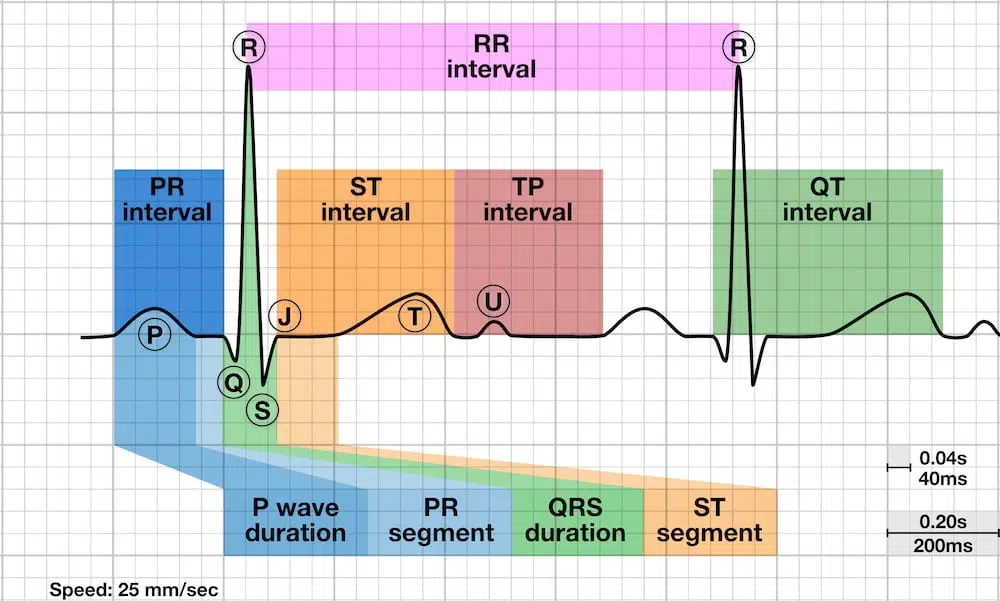

In [42]:
#heartDisease_df = pd.read_csv(io.BytesIO(heartDisease['Heart Disease Dataset.csv']))
heartDisease_df = pd.read_csv('Heart Disease Dataset.csv')

Columns for above are


        age
        sex (1 is male, 0 = female)
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



age in years

(1 = male; 0 = female)

chest pain type

resting blood pressure (in mm Hg on admission to the hospital)

serum cholestoral in mg/dl


## Heart Failure Prediction Dataset

In [43]:
#heartFailure_df = pd.read_csv(io.BytesIO(heartFailure['Heart Failure Prediction Dataset.csv']))
heartFailure_df = pd.read_csv('Heart Failure Prediction Dataset.csv')

heartFailure_df Column Documentation
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Cleaning

In [44]:
# No null value
heartFailure_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [45]:
# Values in Age looks normal
heartFailure_df.Age.value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64

In [46]:
# Values in Sex looks normal
heartFailure_df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [47]:
# Values in ChestPainType are those in description
heartFailure_df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [48]:
# There is 1 value in RestingBP there may be invalid. It has a RestingBP of 0
heartFailure_df.RestingBP.value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

In [49]:
# There is several value in Cholesterol that may be invalid with values of 0
heartFailure_df.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [50]:
# Values are good
heartFailure_df.FastingBS.value_counts().sort_index()

0    704
1    214
Name: FastingBS, dtype: int64

In [51]:
# Values are good
heartFailure_df.RestingECG.value_counts().sort_index()

LVH       188
Normal    552
ST        178
Name: RestingECG, dtype: int64

In [52]:
# Values are good
heartFailure_df.MaxHR.value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

In [53]:
# Values are good
heartFailure_df.ExerciseAngina.value_counts().sort_index()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [54]:
# Values are good
heartFailure_df.ST_Slope.value_counts().sort_index()

Down     63
Flat    460
Up      395
Name: ST_Slope, dtype: int64

In [55]:
# Values are good
heartFailure_df.HeartDisease.value_counts().sort_index()

0    410
1    508
Name: HeartDisease, dtype: int64

Need to clean:
1. RestingBP (invailid value of 0)
2. Cholesterol (invalid value of 0)

In [56]:
# Drop 0 values in RestingBP
heartFailure_df = heartFailure_df[heartFailure_df.RestingBP != 0]

In [57]:
# Drop 0 values i nCholesterol
heartFailure_df = heartFailure_df[heartFailure_df.Cholesterol != 0]

heartFailure_df Column Documentation
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

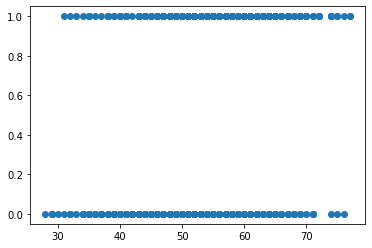

In [58]:
# Plot not helpful
plt.scatter(x=heartFailure_df.Age, y=heartFailure_df.HeartDisease)

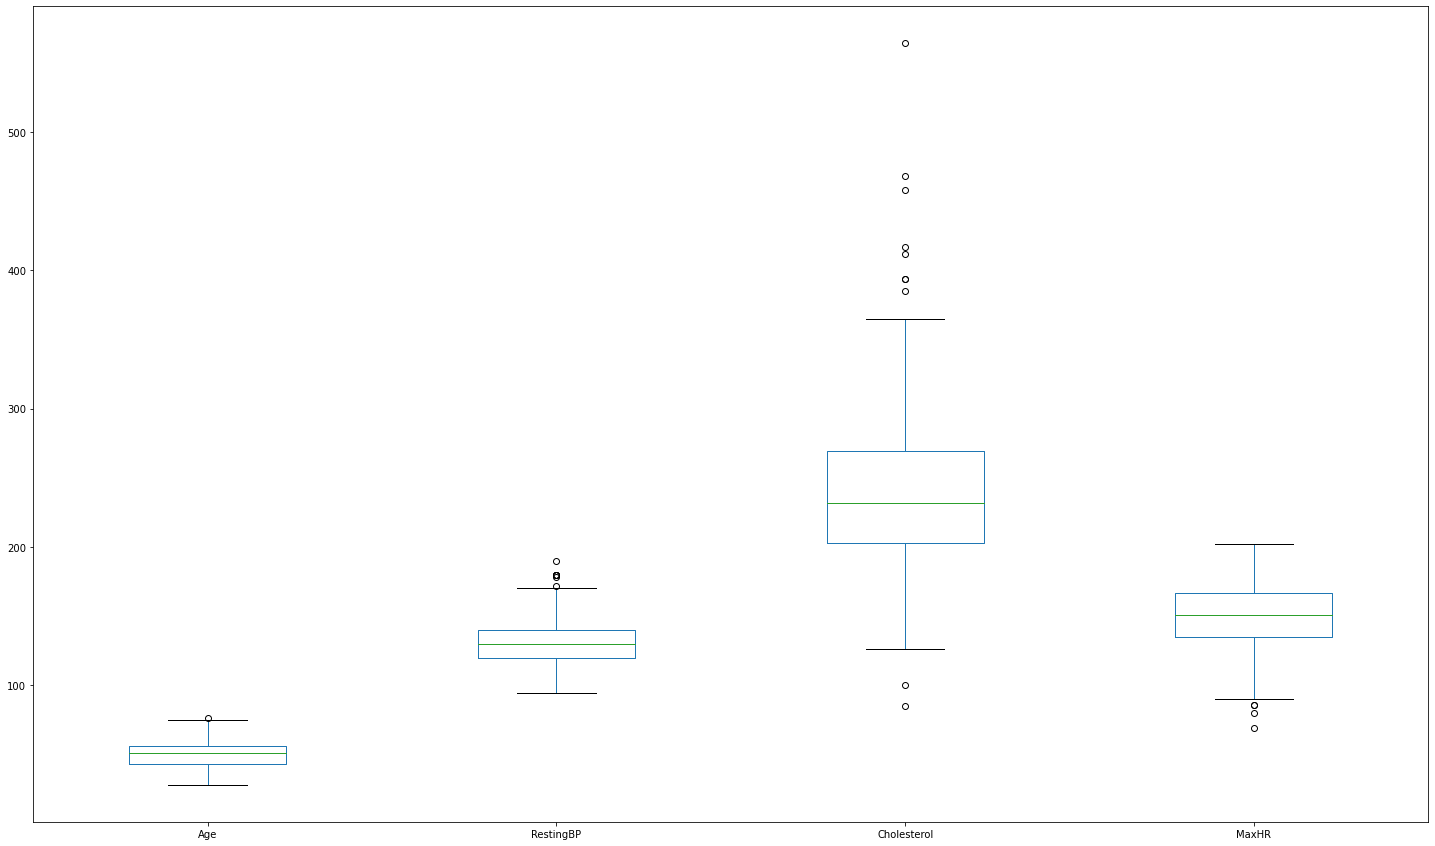

In [68]:
heartFailure_df[heartFailure_df.HeartDisease == 0][['Age', 'RestingBP', 'Cholesterol', 'MaxHR']].plot.box(figsize=(25,15))

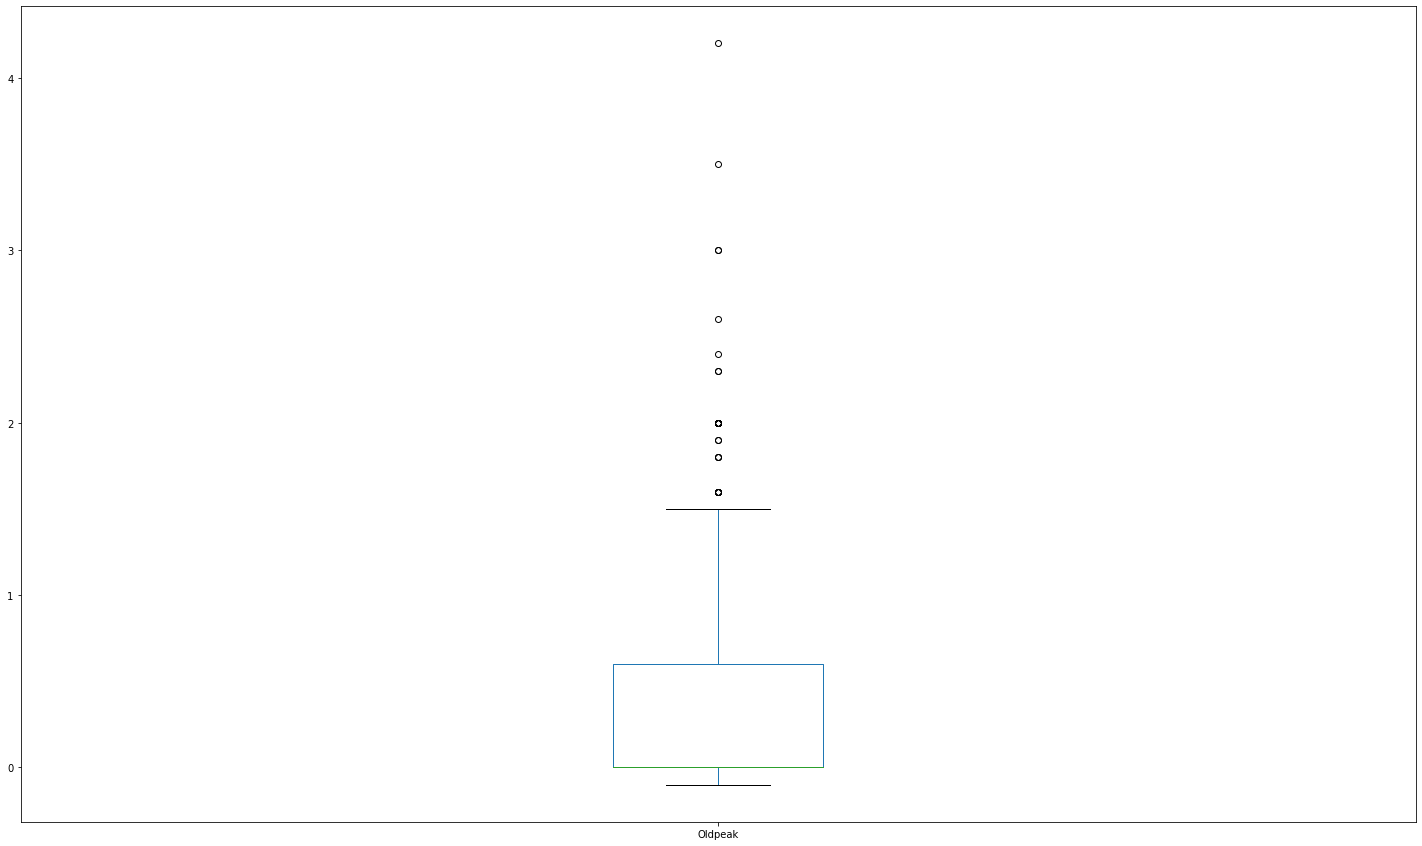

In [69]:
heartFailure_df[heartFailure_df.HeartDisease == 0]['Oldpeak'].plot.box(figsize=(25,15))